In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import afterglowpy as grb

In [2]:
def loadDataFromFile(filename):
    """
    Load GRB afterglow data from a .txt file.
    
    Arguments
    
        filename: the name (and path) to the data file.
        
    Returns
        
        t: array
            observed times in seconds
        nu: array
            observed frequency in Hz
        Fnu: array
            observed flux in mJy
        Ferr: array
            uncertainty in observed flux in mJy
    """
    
    
    t_all, nu_all, Fnu_all, Ferr_all, ul_all = np.loadtxt(filename, usecols=[0,1,2,3,4], unpack=True)
    
    detections = (ul_all == 0.0)
    t_det = t_all[detections]
    nu_det = nu_all[detections]
    Fnu_det = Fnu_all[detections]
    Ferr_det = Ferr_all[detections]
    
    return t_det, nu_det, Fnu_det, Ferr_det

In [3]:
t_data, nu_data, Fnu_data, Ferr_data = loadDataFromFile("160509A_data.txt")

Text(0, 0.5, 'Flux (Brightness)')

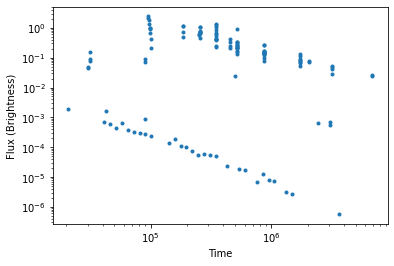

In [4]:
#plt.loglog spreads it all out in logarithmic scale

plt.loglog(t_data, Fnu_data, ls = "", marker = ".")
plt.xlabel("Time")
plt.ylabel("Flux (Brightness)")

In [5]:
print(t_data.shape)
print(nu_data.shape)
print(Fnu_data.shape)

(127,)
(127,)
(127,)


In [6]:
print(nu_data)

[1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 1.20899462e+18 1.20899462e+18 1.20899462e+18 1.20899462e+18
 5.00000000e+09 7.40000000e+09 8.50000000e+09 1.10000000e+10
 5.00000000e+09 7.40000000e+09 8.50000000e+09 1.10000000e+10
 1.35000000e+10 1.60000000e+10 1.92000000e+10 2.45000000e+10
 3.00000000e+10 3.70000000e+10 5.00000000e+09 7.40000000e+09
 1.92000000e+10 2.45000000e+10 5.00000000e+09 7.40000000e+09
 8.50000000e+09 1.10000000e+10 1.35000000e+10 1.60000000e+10
 1.92000000e+10 2.45000000e+10 3.00000000e+10 3.70000000e+10
 1.64400000e+09 2.67900000e+09 3.52300000e+09 5.00000000e+09
 7.40000000e+09 8.50000000e+09 1.10000000e+10 1.35000000e+10
 1.60000000e+10 1.920000

Text(0, 0.5, 'Flux (Brightness)')

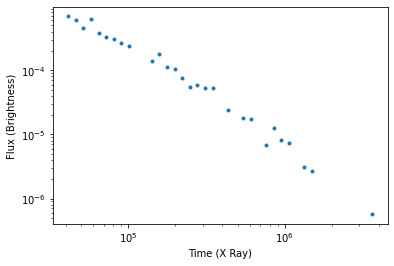

In [7]:
#Isolating X Ray frequencies

nuX_lo = 10**16
nuX_hi = 10**20
nuX_data = nu_data[(nu_data>nuX_lo) & (nu_data<nuX_hi)]

tX_data = t_data[(nu_data>nuX_lo) & (nu_data<nuX_hi)]

FnuX_data = Fnu_data[(nu_data>nuX_lo) & (nu_data<nuX_hi)]

FerrX_data = Ferr_data[(nu_data>nuX_lo) & (nu_data<nuX_hi)]

plt.loglog(tX_data, FnuX_data, ls = "", marker = ".")
plt.xlabel("Time (X Ray)")
plt.ylabel("Flux (Brightness)")

Text(0, 0.5, 'Flux (Brightness)')

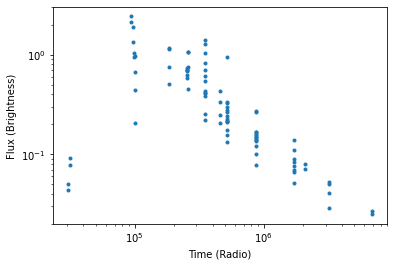

In [8]:
#Isolating Radio Frequencies

nuR_lo = 30
nuR_hi = 10**11
nuR_data = nu_data[(nu_data>nuR_lo) & (nu_data<nuR_hi)]

tR_data = t_data[(nu_data>nuR_lo) & (nu_data<nuR_hi)]

FnuR_data = Fnu_data[(nu_data>nuR_lo) & (nu_data<nuR_hi)]

FerrR_data = Ferr_data[(nu_data>nuR_lo) & (nu_data<nuR_hi)]

plt.loglog(tR_data, FnuR_data, ls = "", marker = ".")
plt.xlabel("Time (Radio)")
plt.ylabel("Flux (Brightness)")

Text(0, 0.5, 'Flux (Brightness)')

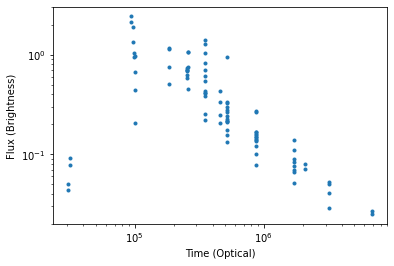

In [9]:
#Isolating Optical Frequencies

nuO_lo = 10**13
nuO_hi = 10**15
nuO_data = nu_data[(nu_data>nuO_lo) & (nu_data<nuO_hi)]

tO_data = t_data[(nu_data>nuO_lo) & (nu_data<nuO_hi)]

FnuO_data = Fnu_data[(nu_data>nuO_lo) & (nu_data<nuO_hi)]

FerrO_data = Ferr_data[(nu_data>nuO_lo) & (nu_data<nuO_hi)]

plt.loglog(tR_data, FnuR_data, ls = "", marker = ".")
plt.xlabel("Time (Optical)")
plt.ylabel("Flux (Brightness)")

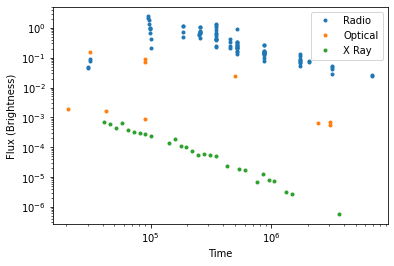

In [10]:
plt.loglog(tR_data, FnuR_data, ls = "", marker = ".", label = "Radio")
plt.loglog(tO_data, FnuO_data, ls = "", marker = ".", label = "Optical")
plt.loglog(tX_data, FnuX_data, ls = "", marker = ".", label = "X Ray")
plt.xlabel("Time")
plt.ylabel("Flux (Brightness)")
plt.legend()
plt.show()

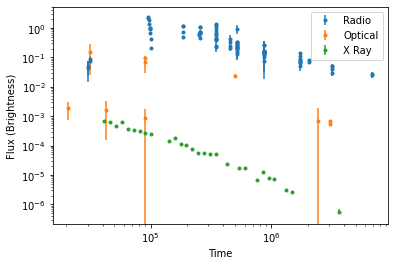

In [11]:
#This makes a graph that has uncertainty incorporated; uses 3 elements

plt.errorbar(tR_data, FnuR_data, FerrR_data, ls = "", marker = ".", label = "Radio")
plt.errorbar(tO_data, FnuO_data, FerrO_data, ls = "", marker = ".", label = "Optical")
plt.errorbar(tX_data, FnuX_data, FerrX_data,ls = "", marker = ".", label = "X Ray")

plt.xscale("log")

plt.yscale('log')

plt.xlabel("Time")
plt.ylabel("Flux (Brightness)")
plt.legend()
plt.show()